<a href="https://colab.research.google.com/github/raulbenitez/UPT_ML/blob/main/mpg_DT_regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import seaborn as sns

mpg = sns.load_dataset("mpg")

mpg.dropna(inplace=True)

X = mpg[['weight','origin','acceleration']]
y = mpg['mpg']

X = X.replace(['europe','japan','usa'],[0,1,2])


MSE of model 1 = 18.681360663420573 ; MSE of model 2 = 17.92831486707028


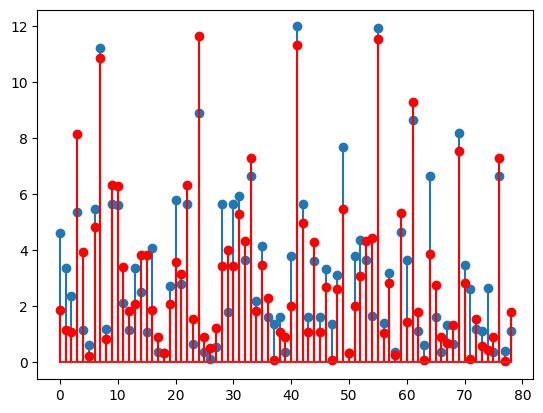

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# split the data with 80% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,train_size=0.8)

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(Xtrain, ytrain)
regr_2.fit(Xtrain, ytrain)

# Predict
y_1 = regr_1.predict(Xtest)
y_2 = regr_2.predict(Xtest)

# Plot the residuals

plt.stem(np.abs(ytest-y_1))
plt.stem(np.abs(ytest-y_2),'r')

# Evaluate mean square error
MSE1 = mean_squared_error(y_1,ytest)
MSE2 = mean_squared_error(y_2,ytest)

print('MSE of model 1 = {} ; MSE of model 2 = {}'.format(MSE1, MSE2))

Let's predict the mpg only using the weight

In [47]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(Xtrain['weight'].values.reshape(-1,1), ytrain)
regr_2.fit(Xtrain['weight'].values.reshape(-1,1), ytrain)

# Predict
y_1 = regr_1.predict(Xtest['weight'].values.reshape(-1,1))
y_2 = regr_2.predict(Xtest['weight'].values.reshape(-1,1))

# Evaluate mean square error
MSE1 = mean_squared_error(y_1,ytest)
MSE2 = mean_squared_error(y_2,ytest)

print('MSE of model 1 = {} ; MSE of model 2 = {}'.format(MSE1, MSE2))

MSE of model 1 = 18.681360663420573 ; MSE of model 2 = 20.386292207286242


In [46]:
Xtest['weight'].values.reshape(-1,1).shape

(79, 1)

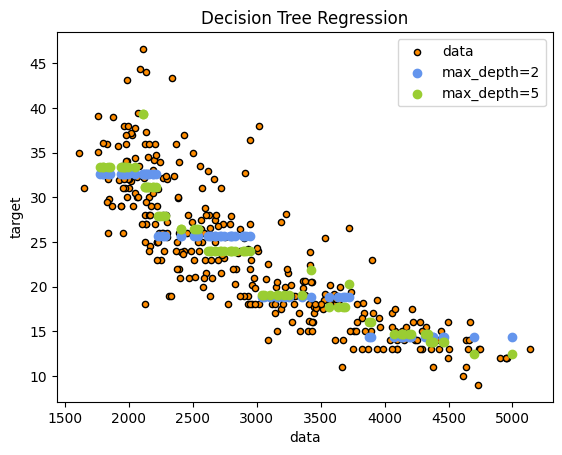

In [48]:
# Plot the results
plt.figure()
plt.scatter(Xtrain['weight'].values, ytrain, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(Xtest['weight'].values, y_1, color="cornflowerblue", label="max_depth=2")
plt.scatter(Xtest['weight'].values, y_2, color="yellowgreen", label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()